In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

 The following code models a population with two competing ideologies ('a' and 'b'). Both have an occaisonal tendecy to turn from pacifistic to violent, in which members from one kill members of the other. This is meant as simple model of ideological conflict in the world.
 
 The first function shall generate a string for each population that determines when each population becomes violent. pva is related to the probability of violence for ideology a, pvb the same for b. The parameter n controls the length of each string. The violent time is multipied by a random integer to ensure that the ideology is violent for long enough to have an effect.
 
 It is called "zetgeist" because both strings are based on the same randomly generated parameter, i.e. the will both be more or less likely to be violent at a given time.


In [2]:
def zeit(n,pva,pvb):
    arr = np.random.random_sample(n)
    sa =''
    sb =''
    ma = (1-pva)
    mb = (1-pvb)
    for i in arr:
        if i*ma >= 0.05:
            sa = sa + 'P'
        if i*ma < 0.05:
            sa = sa+ ('V'*np.random.randint(1,3))
    for i in arr:
        if i*mb >= 0.05:
            sb = sb + 'P'
        if i*mb < 0.05:
            sb = sb+ ('V'*np.random.randint(1,3))
    return sa,sb  

The function will, starting from a given population (N0), generate the growth in that population after a time t(=n times dt) with n steps of dt. K is the carrying capacity, i.e. the max allowable population. The growth parameter r=0.0953 is based on real populations.

The next function is the main function, it willfeature three populations:
        Those with ideology A
        Those with ideology B
        Those with neither
        
An encounter of someone with ideology A with someone espousing B will lead to two people espousing neither (i.e. they convert eachother), encounters with an unconvinced person will pull themover to the side of who they meet. This can be modeled by the following relations (where NA,NB,NN represent the number believing A,B or neither respectively:

                dNA/dt = 1/N(NA*NN - NA*NB)   dNB/dt = 1/N(NB*NN - NA*NB)
                
                        dNN/dt = 1/N(2*NA*NB - NN*(NB + NA) )
                        
dNN/dt shallbe left implicit however, since:

                                NN = N -NA -NB

and that also will lead to all new population growth leading to growth of NN only i.e. people aren't born with an ideology.

In the following code, each ideology is initiialized at a quarter of the total population. Violent ideologies lose adherents at twice the rate due to their repulsiveness. 

In [14]:
def ideo_conflict(N0, pva,pvb,K,n,dt):
    sa,sb = zeit(n,pva,pvb)
    N = N0
    NA = int(0.25*N)
    NB = int(0.25*N)
    for i in range(0,n+1):
        if sa[i] == "P":
            if sb[i] == "P":
                N += int(0.0953*dt*N*(1-float(N)/K))
                NA1 = NA
                NB1 = NB
                NN = N - NA1 - NB1
                NA += int(dt*(1.0/N)*(NA1*NN - NA1*NB1))
                NB += int(dt*(1.0/N)*(NB1*NN - NA1*NB1))
            if sb[i] == "V":
                N += int(0.0953*dt*N*(1-float(N)/K))
                NA1 = NA
                NB1 = NB
                NN = N - NA1 - NB1
                NA += int(dt*(1.0/N)*(NA1*NN - NA1*NB1)) - int(0.1*NA1*NB1/N)
                NB += int(dt*(1.0/N)*(NB1*NN - 2*NA1*NB1))
                N += -int(0.1*NA1*NB1/N)
        if sa[i] == "V":
            if sb[i] == "P":
                N += int(0.0953*dt*N*(1-float(N)/K))
                NA1 = NA
                NB1 = NB
                NN = N - NA1 - NB1
                NA += int(dt*(1.0/N)*(NA1*NN - 2*NA1*NB1))
                NB += int(dt*(1.0/N)*(NB1*NN - NA1*NB1)) - int(0.1*NA1*NB1/N)
                N += -int(0.1*NA1*NB1/N)  
            if sb[i] == "V":
                N += int(0.0953*dt*N*(1-float(N)/K))
                NA1 = NA
                NB1 = NB
                NN = N - NA1 - NB1
                NA += int(dt*(1.0/N)*(NA1*NN - 2*NA1*NB1)) - int(0.1*NA1*NB1/N)
                NB += int(dt*(1.0/N)*(NB1*NN - 2*NA1*NB1)) - int(0.1*NA1*NB1/N)
                N += -int(0.2*NA1*NB1/N)
    return NA,NB,N

Now to test the code. N0 will be 1,000, K will be 10,000, dt will be 1 (year), n will be 1000 (years), and pva = 0.2, pvb= 0.1. 

In [16]:
A,B,C = ideo_conflict(1000,0.5,0.4,10000,100,1)

print(float(A)/C)
print(float(B)/C)

0.0
0.9998998999


Looks like the violent ideology won, despite incurring a penalty in attractiveness. To see how well this result hold, we'll plot a graph of pva vs pvb, while the other parameters remain fixed. The percentage completion will occaisionally print.

In [17]:
grid = np.zeros( (513,513,3), dtype = np.uint8)
x_values = []
y_values = []
for i in range(0,512):
    xj = 0 + i*(0.1/512)
    x_values.append(xj)
    y_values.append(xj)
    
for x in x_values:
    i = x_values.index(x)
    if i % 32 == 0:
        p = (float(i)/512)*100.0
        print p
    for y in y_values:
        j = y_values.index(y)
        A,B,C = ideo_conflict(1000,x,y,10000,1000,1)
        if C == 0:
            grid[i,j] = [255,255,255]
        else:
            pa = float(A)/C
            pb = float(B)/C
            grid[i,j] = [int(255*pa),int(255*pb),0]
            
plt.imshow(grid)

0.0


KeyboardInterrupt: 

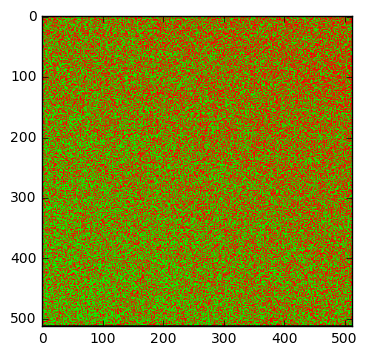

In [6]:
plt.show()

In [7]:
grid[0,300]

array([  0, 254,   0], dtype=uint8)